# Import Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import svm

from sklearn.model_selection import (
    train_test_split, KFold, cross_val_score, GridSearchCV)

from sklearn.preprocessing import (
    scale, LabelEncoder, StandardScaler,
    MinMaxScaler, Normalizer, RobustScaler
)

from sklearn.metrics import (
    classification_report, accuracy_score, f1_score,
    precision_score, confusion_matrix, recall_score,
    roc_auc_score, roc_curve
)

# to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# The number of numbers that will be shown after the comma.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1. EDA

##Load Data

Data Set Story:

Air Pollution is contamination of the indoor or outdoor environment by any chemical, physical or biological agent that modifies the natural characteristics of the atmosphere. Household combustion devices, motor vehicles, industrial facilities and forest fires are common sources of air pollution. Pollutants of major public health concern include particulate matter, carbon monoxide, ozone, nitrogen dioxide and sulfur dioxide. Outdoor and indoor air pollution cause respiratory and other diseases and are important sources of morbidity and mortality.

Features:
*   **Country** : Name of the country
*   **City**  : Name of the city
*   **AQI Value** : Overall AQI value of the city
*   **AQI Category**  : Overall AQI category of the city
*   **CO AQI Value**  : AQI value of Carbon Monoxide of the city
*   **CO AQI Category** : AQI category of Carbon Monoxide of the city
*   **Ozone AQI Value** : AQI value of Ozone of the city
*   **Ozone AQI Category** : AQI category of Ozone of the city
*   **NO2 AQI Value** : AQI value of Nitrogen Dioxide of the city
*   **NO2 AQI Category** : AQI category of Nitrogen Dioxide of the city
*   **PM2.5 AQI Value** : AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city
*   **PM2.5 AQI Category** : AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city

In [7]:
df = pd.read_csv("/content/drive/MyDrive/FINPROO/global air pollution.csv")

##Description

In [8]:
df.shape

(23463, 12)

In [9]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [11]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.00,23463.00,23463.00,23463.00,23463.00
mean,72.01,1.37,35.19,3.06,68.52
std,56.06,1.83,28.10,5.25,54.80
min,6.00,0.00,0.00,0.00,0.00
25%,39.00,1.00,21.00,0.00,35.00
50%,55.00,1.00,31.00,1.00,54.00
75%,79.00,1.00,40.00,4.00,79.00
max,500.00,133.00,235.00,91.00,500.00


In [12]:
df.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [13]:
df['Country'].nunique()

175

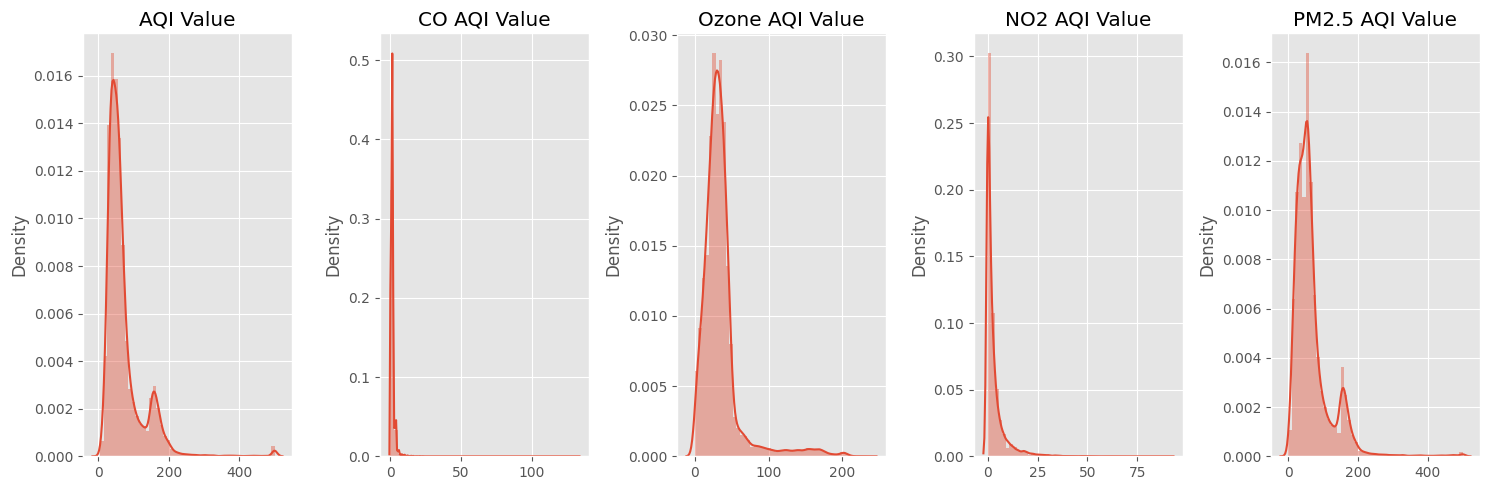

In [14]:
col=[ 'AQI Value', 'CO AQI Value',
       'Ozone AQI Value','NO2 AQI Value', 'PM2.5 AQI Value']
fig = plt.figure(figsize=(15,5))

for i in range(len(col)):
    plt.subplot(1,5,i+1)
    plt.title(col[i])
    sns.distplot(df,x=df[col[i]])
plt.tight_layout()
plt.show()

<Axes: >

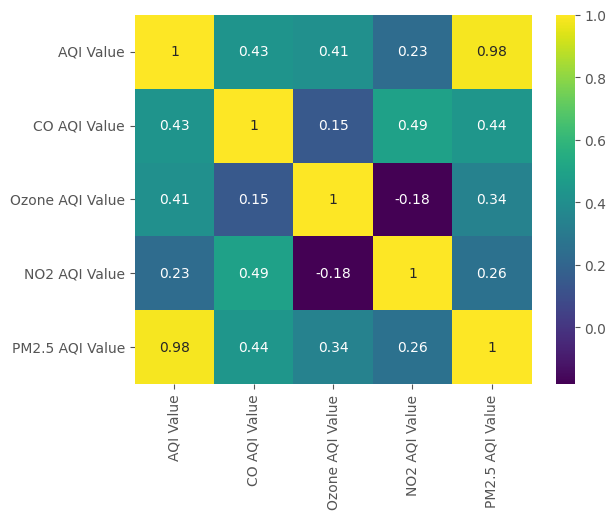

In [15]:
col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
corr_matrix = df.loc[:, col].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')


In [16]:
df_sorted = df[df["Country"] == "Indonesia"]
df_sorted.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
31,Indonesia,Pontianak,44,Good,1,Good,15,Good,0,Good,44,Good
96,Indonesia,Tidore,21,Good,0,Good,13,Good,0,Good,21,Good
193,Indonesia,Sungaipenuh,17,Good,1,Good,13,Good,0,Good,17,Good
215,Indonesia,Tarogong,88,Moderate,2,Good,53,Moderate,1,Good,88,Moderate
353,Indonesia,Binjai,92,Moderate,2,Good,45,Good,0,Good,92,Moderate


In [17]:
df["AQI Category"].value_counts()

AQI Category
Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: count, dtype: int64

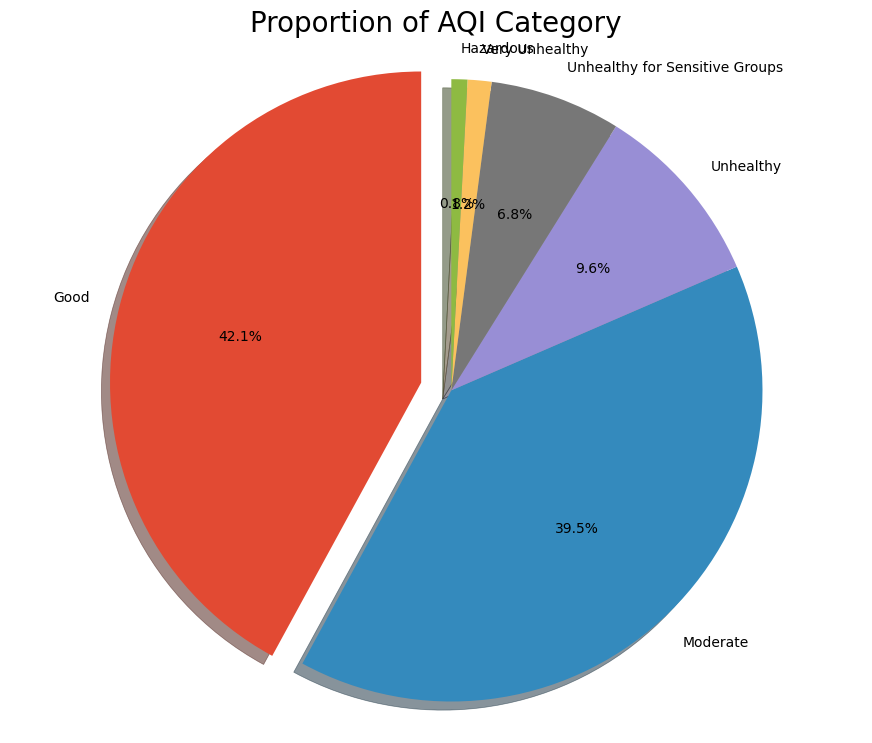

In [18]:
labels = 'Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Very Unhealthy', 'Hazardous'
sizes = [
    df[df['AQI Category']=='Good'].count()[0],
    df[df['AQI Category']=='Moderate'].count()[0],
    df[df['AQI Category']=='Unhealthy'].count()[0],
    df[df['AQI Category']=='Unhealthy for Sensitive Groups'].count()[0],
    df[df['AQI Category']=='Very Unhealthy'].count()[0],
    df[df['AQI Category']=='Hazardous'].count()[0]
]

explode = (0.1, 0, 0, 0, 0, 0)
fig, ax = plt.subplots(figsize=(11, 9))
ax.pie(
    sizes, explode=explode,
    labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90
)
ax.axis('equal')
plt.title("Proportion of AQI Category", size=20)
plt.show()

In [19]:
df_sorted["AQI Category"].value_counts()

AQI Category
Moderate                          179
Good                               76
Unhealthy                          73
Unhealthy for Sensitive Groups     35
Very Unhealthy                     16
Name: count, dtype: int64

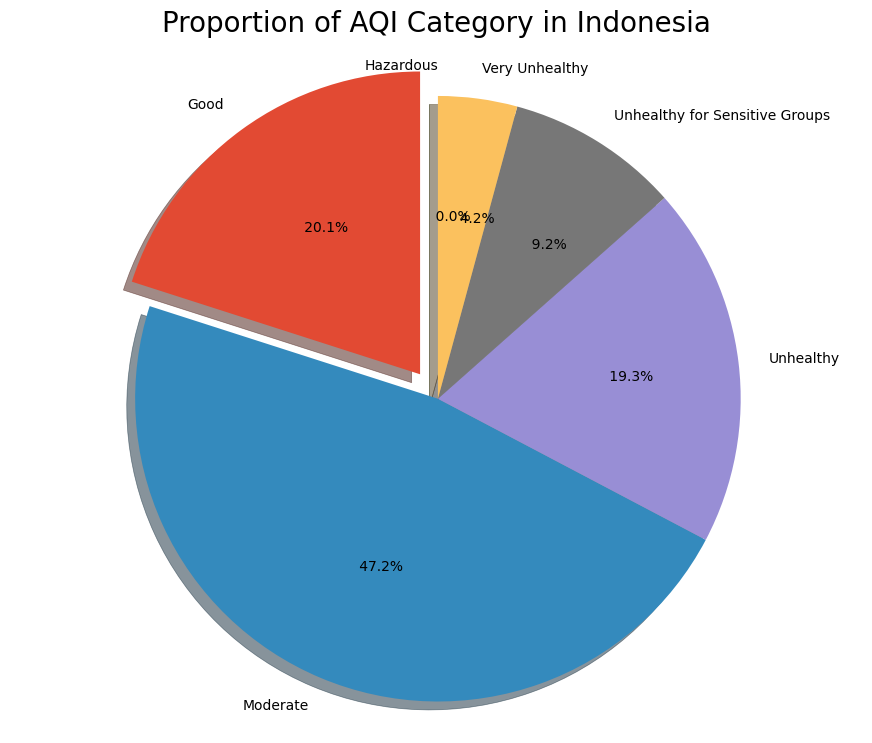

In [20]:
labels = 'Good', 'Moderate', 'Unhealthy', 'Unhealthy for Sensitive Groups', 'Very Unhealthy', 'Hazardous'
sizes = [
    df_sorted[df_sorted['AQI Category']=='Good'].count()[0],
    df_sorted[df_sorted['AQI Category']=='Moderate'].count()[0],
    df_sorted[df_sorted['AQI Category']=='Unhealthy'].count()[0],
    df_sorted[df_sorted['AQI Category']=='Unhealthy for Sensitive Groups'].count()[0],
    df_sorted[df_sorted['AQI Category']=='Very Unhealthy'].count()[0],
    df_sorted[df_sorted['AQI Category']=='Hazardous'].count()[0]
]

explode = (0.1, 0, 0, 0, 0, 0)
fig, ax = plt.subplots(figsize=(11, 9))
ax.pie(
    sizes, explode=explode,
    labels=labels, autopct='%10.1f%%',
    shadow=True, startangle=90
)
ax.axis('equal')
plt.title("Proportion of AQI Category in Indonesia", size=20)
plt.show()

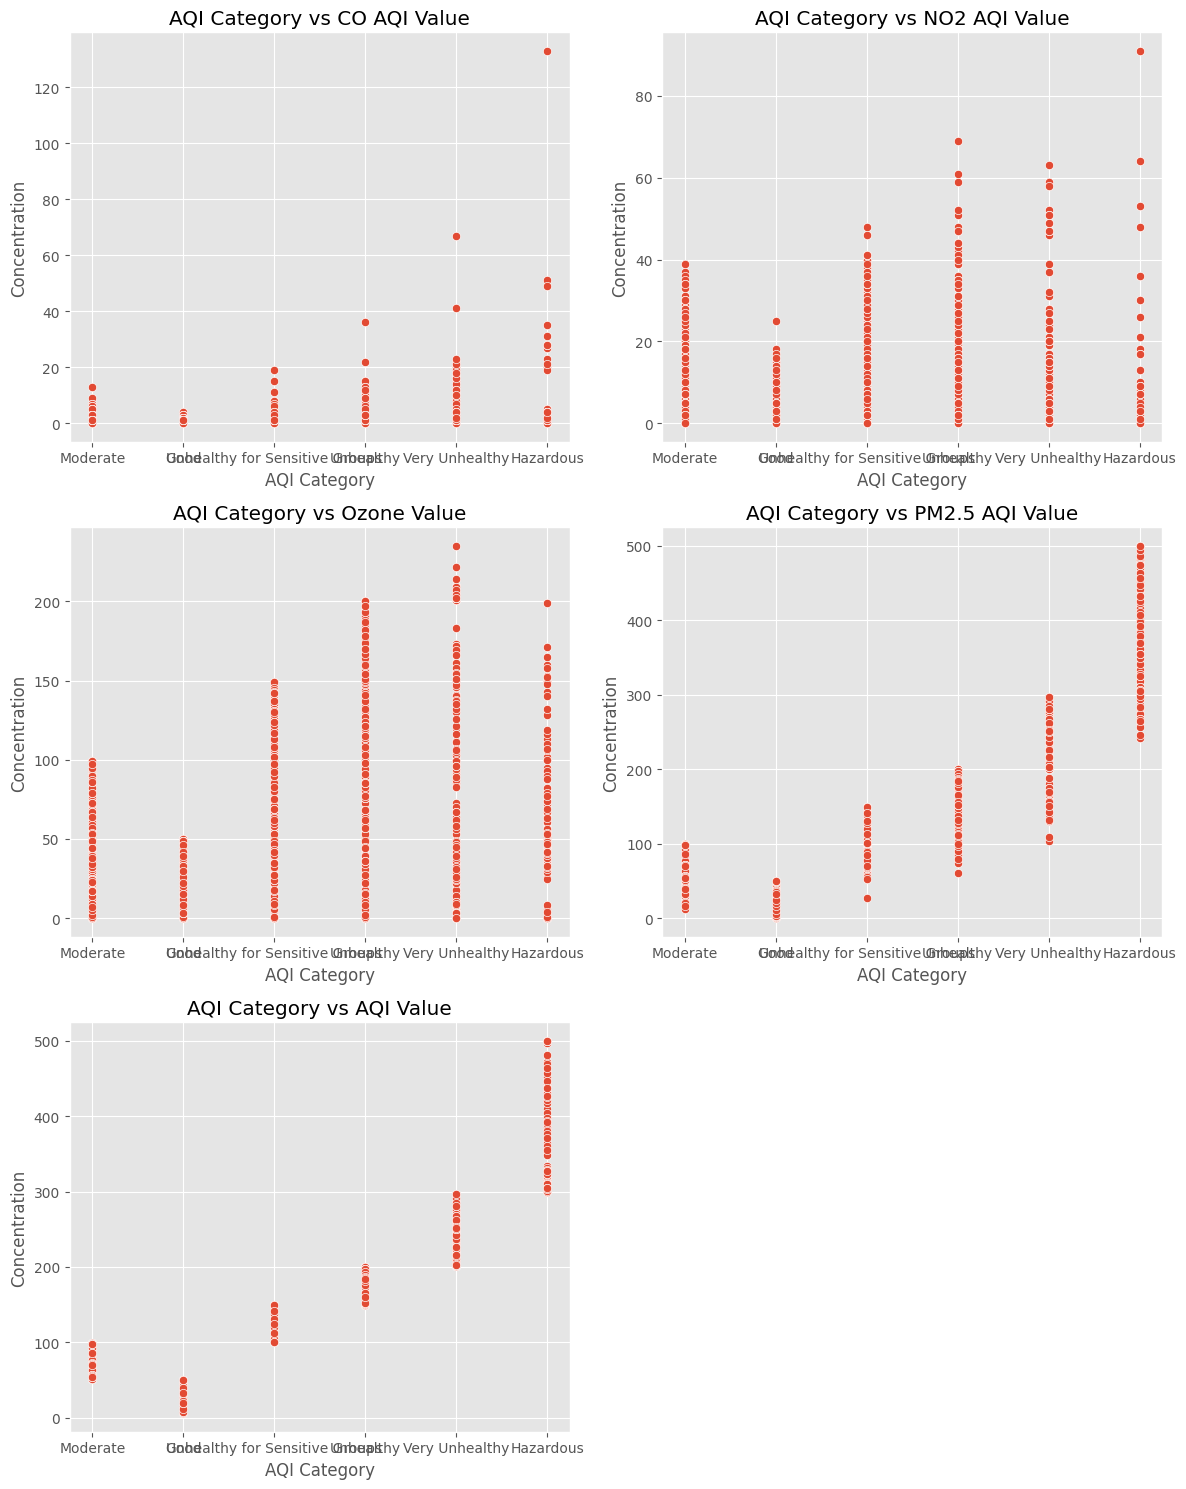

In [21]:
# Membuat subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Scatter plot AQI Value vs AQI Category
sns.scatterplot(x='AQI Category', y='AQI Value', data=df, ax=axes[2, 0])
axes[2, 0].set_title('AQI Category vs AQI Value')

# Scatter plot AQI Value vs CO AQI Value
sns.scatterplot(x='AQI Category', y='CO AQI Value', data=df, ax=axes[0, 0])
axes[0, 0].set_title('AQI Category vs CO AQI Value')

# Scatter plot AQI Value vs NO2 AQI Value
sns.scatterplot(x='AQI Category', y='NO2 AQI Value', data=df, ax=axes[0, 1])
axes[0, 1].set_title('AQI Category vs NO2 AQI Value')

# Scatter plot AQI Value vs Ozone Value
sns.scatterplot(x='AQI Category', y='Ozone AQI Value', data=df, ax=axes[1, 0])
axes[1, 0].set_title('AQI Category vs Ozone Value')

# Scatter plot AQI Value vs PM2.5 AQI Value
sns.scatterplot(x='AQI Category', y='PM2.5 AQI Value', data=df, ax=axes[1, 1])
axes[1, 1].set_title('AQI Category vs PM2.5 AQI Value')

# Menonaktifkan plot yang tidak terpakai
axes[2, 1].axis('off')

# Menambahkan label sumbu
for ax in axes.flat:
    ax.set(xlabel='AQI Category', ylabel='Concentration')

# Menyesuaikan tata letak
plt.tight_layout()

# Menampilkan plot
plt.show()

# 2. Data Preparation For Modelling

In [22]:
data_ku = df.copy()

In [23]:
data_ku.dropna(inplace=True)

In [24]:
data_ku['Key'] = data_ku['Country'] +'_'+ data_ku['City']
data_ku.set_index('Key', inplace=True)

In [25]:
Kolom_drop = ['Country', 'City', 'AQI Value', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
data_ku.drop(Kolom_drop, axis=1, inplace=True)

In [26]:
data_ku.head()

,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
Key,,,,,
Russian Federation_Praskoveya,Moderate,1,36,0,51
Brazil_Presidente Dutra,Good,1,5,1,41
Italy_Priolo Gargallo,Moderate,1,39,2,66
Poland_Przasnysz,Good,1,34,0,20
France_Punaauia,Good,0,22,0,6


In [27]:
data_ku.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23035 entries, Russian Federation_Praskoveya to Malaysia_Marang
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AQI Category     23035 non-null  object
 1   CO AQI Value     23035 non-null  int64 
 2   Ozone AQI Value  23035 non-null  int64 
 3   NO2 AQI Value    23035 non-null  int64 
 4   PM2.5 AQI Value  23035 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ MB


In [28]:
data_ku.shape

(23035, 5)

In [29]:
#Memisahkan data dan label
Y = data_ku['AQI Category']

Kolom_drop = ['AQI Category']

X = data_ku.drop(Kolom_drop, axis=1)

In [30]:
X

Output hidden; open in https://colab.research.google.com to view.

In [31]:
Y

Output hidden; open in https://colab.research.google.com to view.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(23035, 4) (18428, 4) (4607, 4)


In [34]:
print(X_train_scaled.shape, X_test_scaled.shape)

(18428, 4) (4607, 4)


#3. Modeling

## Basic Model

In [35]:
model_reg_1 = svm.SVC(C=0.1, kernel='linear', random_state=42)
model_reg_1.fit(X_train_scaled, Y_train)
y_pred = model_reg_1.predict(X_test_scaled)
svm_acc = accuracy_score(Y_test, y_pred)
print(classification_report(Y_test, y_pred))

                                precision    recall  f1-score   support

                          Good       0.97      0.96      0.97      1926
                     Hazardous       0.92      0.98      0.95        45
                      Moderate       0.95      0.96      0.95      1841
                     Unhealthy       0.90      0.97      0.93       405
Unhealthy for Sensitive Groups       0.93      0.83      0.88       333
                Very Unhealthy       0.95      0.63      0.76        57

                      accuracy                           0.95      4607
                     macro avg       0.93      0.89      0.91      4607
                  weighted avg       0.95      0.95      0.95      4607



In [36]:
model_reg_2 = RandomForestClassifier(ccp_alpha=0.01, random_state=42)
model_reg_2.fit(X_train_scaled, Y_train)
y_pred = model_reg_2.predict(X_test_scaled)
Random_Forest_Classifier_acc = accuracy_score(Y_test, y_pred)
print(classification_report(Y_test, y_pred))

                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1926
                     Hazardous       0.00      0.00      0.00        45
                      Moderate       0.99      1.00      0.99      1841
                     Unhealthy       0.79      0.94      0.86       405
Unhealthy for Sensitive Groups       0.94      0.95      0.94       333
                Very Unhealthy       0.00      0.00      0.00        57

                      accuracy                           0.97      4607
                     macro avg       0.62      0.65      0.63      4607
                  weighted avg       0.95      0.97      0.96      4607



In [37]:
model_reg_3 = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.01, random_state=42)
model_reg_3.fit(X_train_scaled, Y_train)
y_pred = model_reg_3.predict(X_test_scaled)
Decision_Tree_Classifier_acc = accuracy_score(Y_test, y_pred)
print(classification_report(Y_test, y_pred))

                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1926
                     Hazardous       0.00      0.00      0.00        45
                      Moderate       0.99      1.00      0.99      1841
                     Unhealthy       0.99      0.94      0.96       405
Unhealthy for Sensitive Groups       0.93      0.95      0.94       333
                Very Unhealthy       0.53      0.88      0.66        57

                      accuracy                           0.98      4607
                     macro avg       0.74      0.79      0.76      4607
                  weighted avg       0.97      0.98      0.98      4607



In [38]:
data_ku.columns

Index(['AQI Category', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value',
       'PM2.5 AQI Value'],
      dtype='object')

In [39]:
# Printing accuracy scores
print("SVM Classifier Accuracy:", svm_acc)
print("Random Forest Classifier Accuracy:", Random_Forest_Classifier_acc)
print("Decision Tree Classifier Accuracy:", Decision_Tree_Classifier_acc)

# Choosing the best model
best_model = None
best_accuracy = 0.0

if svm_acc > best_accuracy:
    best_accuracy = svm_acc
    best_model = "SVM Classifier"

if Random_Forest_Classifier_acc > best_accuracy:
    best_accuracy = Random_Forest_Classifier_acc
    best_model = "Random Forest Classifier"

if Decision_Tree_Classifier_acc > best_accuracy:
    best_accuracy = Decision_Tree_Classifier_acc
    best_model = "Decision Tree Classifier"

print("Best Model:", best_model)
print("Accuracy of the Best Model:", best_accuracy)

SVM Classifier Accuracy: 0.948990666377252
Random Forest Classifier Accuracy: 0.9687432168439332
Decision Tree Classifier Accuracy: 0.9791621445626221
Best Model: Decision Tree Classifier
Accuracy of the Best Model: 0.9791621445626221


In [40]:
classifier_1 = model_reg_3

In [41]:
train_prediction = classifier_1.predict(X_train_scaled)
test_prediction = classifier_1.predict(X_test_scaled)

In [42]:
train_accuracy = accuracy_score(Y_train, train_prediction)
test_accuracy = accuracy_score(Y_test, test_prediction)
print('Akurasi data train =', train_accuracy)
print('Akurasi data test =', test_accuracy)

Akurasi data train = 0.9799218580421099
Akurasi data test = 0.9791621445626221


In [43]:
# Assuming you have defined 'Scaler' and 'classifier' somewhere in your code.
Kota = str(input('Masukkan Nama Kota = '))
CO_AQI_Value = int(input('Masukkan Nilai CO AQI Value ='))
Ozone_AQI_Value = int(input('Masukkan Nilai Ozone AQI Value ='))
NO2_AQI_Value = int(input('Masukkan Nilai NO2 AQI Value ='))
PM2_5_AQI_Value = int(input('Masukkan Nilai PM2.5 AQI Value ='))

input_data = [CO_AQI_Value, Ozone_AQI_Value, NO2_AQI_Value, PM2_5_AQI_Value]
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Assuming you have defined 'Scaler' somewhere in your code.
std_data = scaler.transform(input_data_reshape)

# Assuming you have defined 'classifier' somewhere in your code.
prediction = classifier_1.predict(std_data)

print('Indeks Kualitas Udara (AQI) di Kota=', Kota)
print('Status Kategori  = ' ,prediction)

Masukkan Nama Kota = Depok
Masukkan Nilai CO AQI Value =30
Masukkan Nilai Ozone AQI Value =40
Masukkan Nilai NO2 AQI Value =20
Masukkan Nilai PM2.5 AQI Value =10
Indeks Kualitas Udara (AQI) di Kota= Depok
Status Kategori  =  ['Good']


##Hyperparameter Tuning

In [45]:
# Tentukan grid parameter yang akan diuji
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Inisialisasi model SVC
model_reg_1_ = svm.SVC(random_state=42)

# Latih model dengan data pelatihan
model_reg_1_.fit(X_train_scaled, Y_train)

# Inisialisasi GridSearchCV dengan model, grid parameter, dan metrik yang ingin diukur
grid_search = GridSearchCV(estimator=model_reg_1_, param_grid=param_grid, cv=5, scoring='accuracy')

# Lakukan pencarian parameter terbaik
grid_search.fit(X_train_scaled, Y_train)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Membuat model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Train prediction menggunakan model terbaik
train_predictions = best_model.predict(X_train_scaled)

# Test prediction menggunakan model terbaik
test_predictions = best_model.predict(X_test_scaled)

# Melakukan prediksi dengan model terbaik
y_pred = best_model.predict(X_test_scaled)

# Menghitung akurasi
svm_acc = accuracy_score(Y_test, y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Best Parameters: {'C': 100, 'kernel': 'rbf'}
Classification Report:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1926
                     Hazardous       0.93      0.91      0.92        45
                      Moderate       1.00      1.00      1.00      1841
                     Unhealthy       0.99      0.99      0.99       405
Unhealthy for Sensitive Groups       0.98      0.98      0.98       333
                Very Unhealthy       0.88      0.91      0.90        57

                      accuracy                           0.99      4607
                     macro avg       0.96      0.96      0.96      4607
                  weighted avg       0.99      0.99      0.99      4607



In [46]:
# Tentukan grid parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model RandomForestClassifier
model_reg_2_ = RandomForestClassifier(ccp_alpha=0.01, random_state=42)

# Latih model dengan data pelatihan
model_reg_2_.fit(X_train_scaled, Y_train)

# Inisialisasi GridSearchCV dengan model, grid parameter, dan metrik yang ingin diukur
grid_search = GridSearchCV(estimator=model_reg_2_, param_grid=param_grid, cv=5, scoring='accuracy')

# Lakukan pencarian parameter terbaik
grid_search.fit(X_train_scaled, Y_train)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Membuat model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Train prediction menggunakan model terbaik
train_predictions = best_model.predict(X_train_scaled)

# Test prediction menggunakan model terbaik
test_predictions = best_model.predict(X_test_scaled)

# Melakukan prediksi dengan model terbaik
y_pred = best_model.predict(X_test_scaled)

# Menghitung akurasi
Random_Forest_Classifier_acc = accuracy_score(Y_test, y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Classification Report:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1926
                     Hazardous       0.00      0.00      0.00        45
                      Moderate       0.99      1.00      0.99      1841
                     Unhealthy       0.79      0.94      0.86       405
Unhealthy for Sensitive Groups       0.94      0.95      0.94       333
                Very Unhealthy       0.00      0.00      0.00        57

                      accuracy                           0.97      4607
                     macro avg       0.62      0.65      0.63      4607
                  weighted avg       0.95      0.97      0.96      4607



In [65]:
# Tentukan grid parameter yang akan diuji
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'ccp_alpha': [0.001, 0.01, 0.1, 1]
}

# Inisialisasi model DecisionTreeClassifier
model_reg_3_ = DecisionTreeClassifier(random_state=42)

# Latih model dengan data pelatihan
model_reg_3_.fit(X_train_scaled, Y_train)

# Inisialisasi GridSearchCV dengan model, grid parameter, dan metrik yang ingin diukur
grid_search = GridSearchCV(estimator=model_reg_3_, param_grid=param_grid, cv=5, scoring='accuracy')

# Lakukan pencarian parameter terbaik
grid_search.fit(X_train_scaled, Y_train)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Membuat model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Train prediction menggunakan model terbaik
train_predictions = best_model.predict(X_train_scaled)

# Test prediction menggunakan model terbaik
test_predictions = best_model.predict(X_test_scaled)

# Melakukan prediksi dengan model terbaik
y_pred = best_model.predict(X_test_scaled)

# Menghitung akurasi
Decision_Tree_Classifier_acc = accuracy_score(Y_test, y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Best Parameters: {'ccp_alpha': 0.001, 'max_depth': 5}
Classification Report:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1926
                     Hazardous       1.00      0.93      0.97        45
                      Moderate       1.00      1.00      1.00      1841
                     Unhealthy       1.00      1.00      1.00       405
Unhealthy for Sensitive Groups       1.00      1.00      1.00       333
                Very Unhealthy       0.95      0.96      0.96        57

                      accuracy                           1.00      4607
                     macro avg       0.99      0.98      0.99      4607
                  weighted avg       1.00      1.00      1.00      4607



In [66]:
# Printing accuracy scores
print("SVM Classifier Accuracy:", svm_acc)
print("Random Forest Classifier Accuracy:", Random_Forest_Classifier_acc)
print("Decision Tree Classifier Accuracy:", Decision_Tree_Classifier_acc)

# Choosing the best model
best_model = None
best_accuracy = 0.0

if svm_acc > best_accuracy:
    best_accuracy = svm_acc
    best_model = "SVM Classifier"

if Random_Forest_Classifier_acc > best_accuracy:
    best_accuracy = Random_Forest_Classifier_acc
    best_model = "Random Forest Classifier"

if Decision_Tree_Classifier_acc > best_accuracy:
    best_accuracy = Decision_Tree_Classifier_acc
    best_model = "Decision Tree Classifier"

print("Best Model:", best_model)
print("Accuracy of the Best Model:", best_accuracy)

SVM Classifier Accuracy: 0.99327110918168
Random Forest Classifier Accuracy: 0.9685261558497938
Decision Tree Classifier Accuracy: 0.9989146950293032
Best Model: Decision Tree Classifier
Accuracy of the Best Model: 0.9989146950293032


In [67]:
classifier_2 = model_reg_3_

In [68]:
# Menghitung akurasi pada data pelatihan setelah penyetelan hiperparameter
train_accuracy_after_tuning = accuracy_score(Y_train, train_predictions)
print("Train Accuracy after tuning:", train_accuracy_after_tuning)

# Menghitung akurasi pada data uji setelah penyetelan hiperparameter
test_accuracy_after_tuning = accuracy_score(Y_test, test_predictions)
print("Test Accuracy after tuning:", test_accuracy_after_tuning)

Train Accuracy after tuning: 0.9988604297807684
Test Accuracy after tuning: 0.9989146950293032


In [69]:
# Assuming you have defined 'Scaler' and 'classifier' somewhere in your code.

Kota = str(input('Masukkan Nama Kota = '))
CO_AQI_Value = int(input('Masukkan Nilai CO AQI Value ='))
Ozone_AQI_Value = int(input('Masukkan Nilai Ozone AQI Value ='))
NO2_AQI_Value = int(input('Masukkan Nilai NO2 AQI Value ='))
PM2_5_AQI_Value = int(input('Masukkan Nilai PM2.5 AQI Value ='))

input_data = [CO_AQI_Value, Ozone_AQI_Value, NO2_AQI_Value, PM2_5_AQI_Value]
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Assuming you have defined 'Scaler' somewhere in your code.
std_data = scaler.transform(input_data_reshape)

# Assuming you have defined 'classifier' somewhere in your code.
prediction = classifier_1.predict(std_data)

print('Indeks Kualitas Udara (AQI) di Kota=', Kota)
print('Status Kategori  = ' ,prediction)

Masukkan Nama Kota = Aceh
Masukkan Nilai CO AQI Value =10
Masukkan Nilai Ozone AQI Value =20
Masukkan Nilai NO2 AQI Value =10
Masukkan Nilai PM2.5 AQI Value =30
Indeks Kualitas Udara (AQI) di Kota= Aceh
Status Kategori  =  ['Good']


# Feature Importance of Best Model (Decision Tree Classifier)

Feature Importance:
           Feature  Importance
3  PM2.5 AQI Value        0.97
1  Ozone AQI Value        0.03
0     CO AQI Value        0.00
2    NO2 AQI Value        0.00


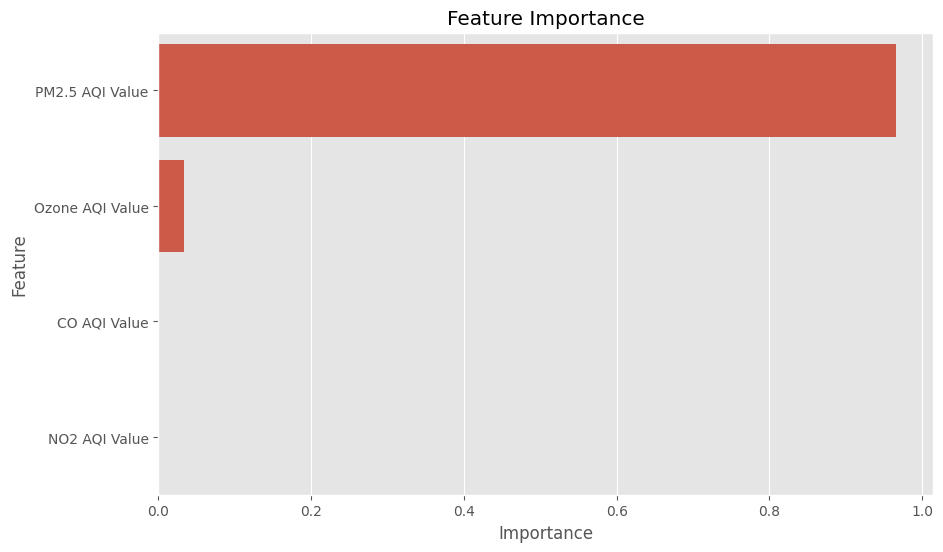

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mendapatkan feature importance dari model terbaik (model_reg_3)
feature_importance = model_reg_3.feature_importances_

# Membuat dataframe untuk menyimpan feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Urutkan feature importance secara menurun
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:")
print(feature_importance_df)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [72]:
import pickle
filename = 'Predict Global Air Pollution modelling.sav'
pickle.dump(classifier_2, open(filename, 'wb'))

In [74]:
import pickle
filename = 'scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))